## Import requirements

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

## Data Preparation

### Dataset understanding

In [2]:
train = pd.read_csv('/home/mehran/Projects/horse_survival/train.csv')
test = pd.read_csv('/home/mehran/Projects/horse_survival/test.csv')

In [4]:
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    789 non-null    object 
 8   peripheral_pulse       777 non-null    object 
 9   mucous_membrane        811 non-null    object 
 10  capillary_refill_time  818 non-null    object 
 11  pain                   795 non-null    object 
 12  peristalsis            805 non-null    object 
 13  abdominal_distention   802 non-null    object 
 14  nasogastric_tube       760 non-null    object 
 15  nasoga

### Column remover function:

In [9]:
remover = lambda data, col_name: data.drop(columns=[col_name])

In [10]:
train = remover(train, 'id')
train_labels = train['outcome']
train = remover(train, 'outcome')
test = remover(test, 'id')

In [11]:
train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


In [12]:
test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [15]:
numeric_feat = train.select_dtypes(include=['float64', 'int64'])
categ_feat = train.select_dtypes(exclude=['float64', 'int64'])
numeric_feat

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,0,0
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,0,0
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,0,0
1233,534784,38.1,70.0,16.0,2.0,58.0,74.0,2.0,2209,0,0


In [16]:
categ_feat

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,NaN,distend_large,serosanguious,yes,no
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,NaN,distend_large,serosanguious,yes,no
1231,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,yes,yes
1232,yes,young,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,yes,yes
1233,yes,adult,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,yes,no


In [18]:
for cat in categ_feat:
    print(f' {cat} has: {categ_feat[cat].unique()}')

 surgery has: ['yes' 'no']
 age has: ['adult' 'young']
 temp_of_extremities has: ['cool' 'cold' 'normal' 'warm' nan]
 peripheral_pulse has: ['reduced' 'normal' nan 'absent' 'increased']
 mucous_membrane has: ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
 capillary_refill_time has: ['more_3_sec' 'less_3_sec' nan '3']
 pain has: ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
 peristalsis has: ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
 abdominal_distention has: ['slight' 'moderate' 'none' 'severe' nan]
 nasogastric_tube has: ['slight' 'none' 'significant' nan]
 nasogastric_reflux has: ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
 rectal_exam_feces has: ['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
 abdomen has: ['distend_small' 'distend_large' 'normal' 'firm' nan 'other']
 abdomo_appearance has: ['serosanguious' 'cloudy' 'clear' nan]
 surgical_lesion has: ['yes' 'no

In [35]:
rect_reshaped = train['rectal_temp'].values.reshape(1235, 1)

In [38]:
rect_reshaped.shape

(1235, 1)

In [39]:
scaler = preprocessing.StandardScaler().fit(rect_reshaped)
rectTempNorm = scaler.transform(rect_reshaped)

In [44]:
rectTempNorm.mean(axis=0)

array([-2.95723859e-15])

In [45]:
rectTempNorm.std()

0.9999999999999998

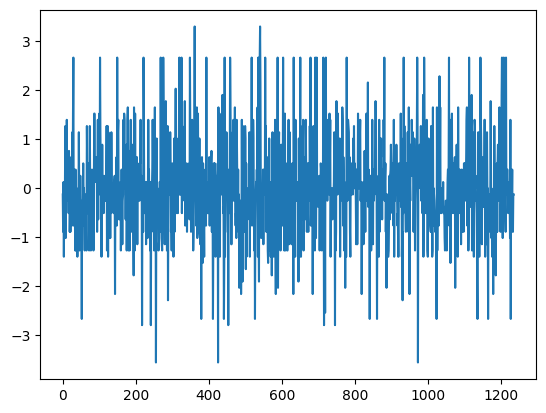

In [49]:
plt.plot(rectTempNorm)

In [55]:
train['capillary_refill_time'].unique()

array(['more_3_sec', 'less_3_sec', nan, '3'], dtype=object)

In [59]:
train.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [62]:
(train.isnull().sum() / len(train)) * 100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp               0.000000
pulse                     0.000000
respiratory_rate          0.000000
temp_of_extremities       3.157895
peripheral_pulse          4.858300
mucous_membrane           1.700405
capillary_refill_time     0.485830
pain                      3.562753
peristalsis               1.619433
abdominal_distention      1.862348
nasogastric_tube          6.477733
nasogastric_reflux        1.700405
nasogastric_reflux_ph     0.000000
rectal_exam_feces        15.384615
abdomen                  17.246964
packed_cell_volume        0.000000
total_protein             0.000000
abdomo_appearance         3.886640
abdomo_protein            0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [69]:
train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


In [71]:
categ_feat

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,NaN,distend_large,serosanguious,yes,no
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,NaN,distend_large,serosanguious,yes,no
1231,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,yes,yes
1232,yes,young,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,yes,yes
1233,yes,adult,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,yes,no


In [ ]:
for cat in categ_feat:
    print(f' {cat} has: {categ_feat[cat].unique()}')

 surgery has: ['yes' 'no']
 age has: ['adult' 'young']
 temp_of_extremities has: ['cool' 'cold' 'normal' 'warm' nan]
 peripheral_pulse has: ['reduced' 'normal' nan 'absent' 'increased']
 mucous_membrane has: ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
 capillary_refill_time has: ['more_3_sec' 'less_3_sec' nan '3']
 pain has: ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
 peristalsis has: ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
 abdominal_distention has: ['slight' 'moderate' 'none' 'severe' nan]
 nasogastric_tube has: ['slight' 'none' 'significant' nan]
 nasogastric_reflux has: ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
 rectal_exam_feces has: ['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
 abdomen has: ['distend_small' 'distend_large' 'normal' 'firm' nan 'other']
 abdomo_appearance has: ['serosanguious' 'cloudy' 'clear' nan]
 surgical_lesion has: ['yes' 'no

In [73]:
categ_impute = SimpleImputer(strategy='most_frequent').fit_transform(train)

In [77]:
type(categ_impute)

numpy.ndarray

In [81]:
train_categ_impute = pd.DataFrame(categ_impute, columns=train.columns)

In [82]:
train_categ_impute.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


In [83]:
train_categ_impute.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64